# Phase 1: Data Collection

## Sheetal Mahanti [21BDS0218]

In [ ]:
# Importing libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [ ]:
cars = pd.read_csv("/work/Cars")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Understanding the structure of the data

In [ ]:
cars.shape

(205, 26)

In [ ]:
# Gives us the description of each column, min, max value, count, mean and standard deviation
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# To get find out how many null values are there in the data, if there are we need to clean them
# Fortunately we didn't have them, still this is how we would have cleaned the data if we had to
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Phase 2: Data Preparation

## Sanjeev Ragunathan  [21BCE0430]

## Cleaning

Detecting and correcting corrupt or inaccurate records from the dataset

### Extracting company name

In [ ]:
# Extracting company name from car name and creating a new column named CompanyName
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(2, 'CompanyName', CompanyName)
cars.head()

,car_ID,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# We don't require car name for creating the model so dropping that
cars.drop(['CarName'], axis=1, inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Fixing invalid values

In [ ]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

As you can see there seems to be spelling errors in the data, which might generate unwanted results

- mazda & maxda

- Nissan & nissan

- porsche & porcshce

- volkswagen & vokswagen & vw

- toyota & toyouta

So we're gonna remove these spelling errors

In [ ]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a, b):
    cars.CompanyName.replace(a, b, inplace=True)

replace_name('maxda', 'mazda')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
# Checking for duplicate rows.
# .duplicated() returns an array of boolean values indicating which rows are ducplicates and which are not. True - duplicate, False - not a duplicate
# As you can see there are no rows shown below therefore, there are no duplicates
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [ ]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Visualisation

Representing data in the form of charts and diagrams, to get a better understanding. And infer relationships among features and price of the car

### statistics of car price

Visualising the distribution and spread of the car price

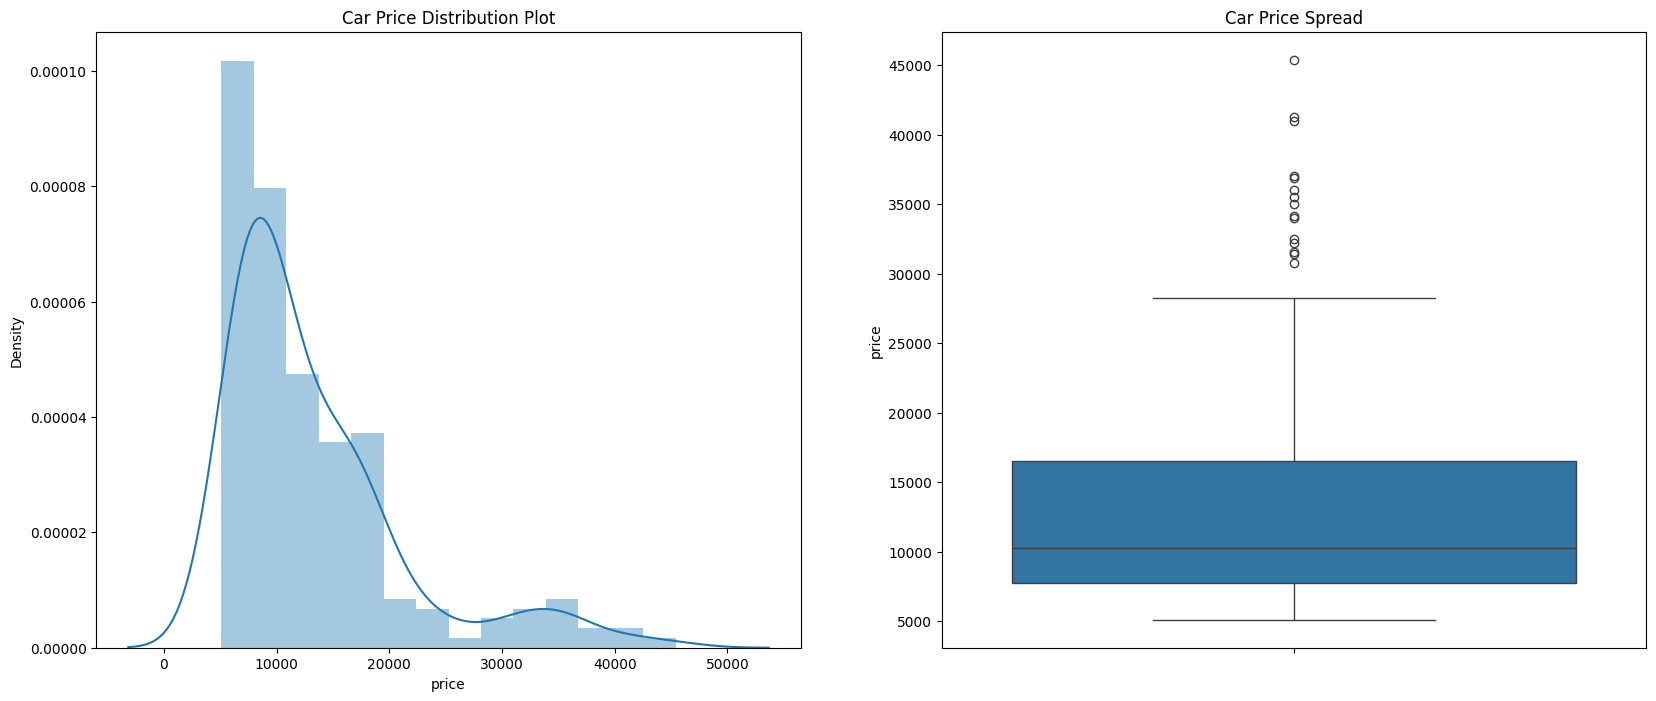

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [ ]:
# Get the description of the price column, to get min, max, count and mean price of cars
cars.price.describe(percentiles = [0.25, 0.50, 0.75, 0.85, 0.90, 1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

Inference

- Most prices in the dataset are low (below $15,000)

- Significant difference between mean($13,276) and median($10,295)

- 85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400. Therefore variance(spread between numbers in a dataset) is high

### Histograms of each feature

visualising each feature and their types and each types frequency

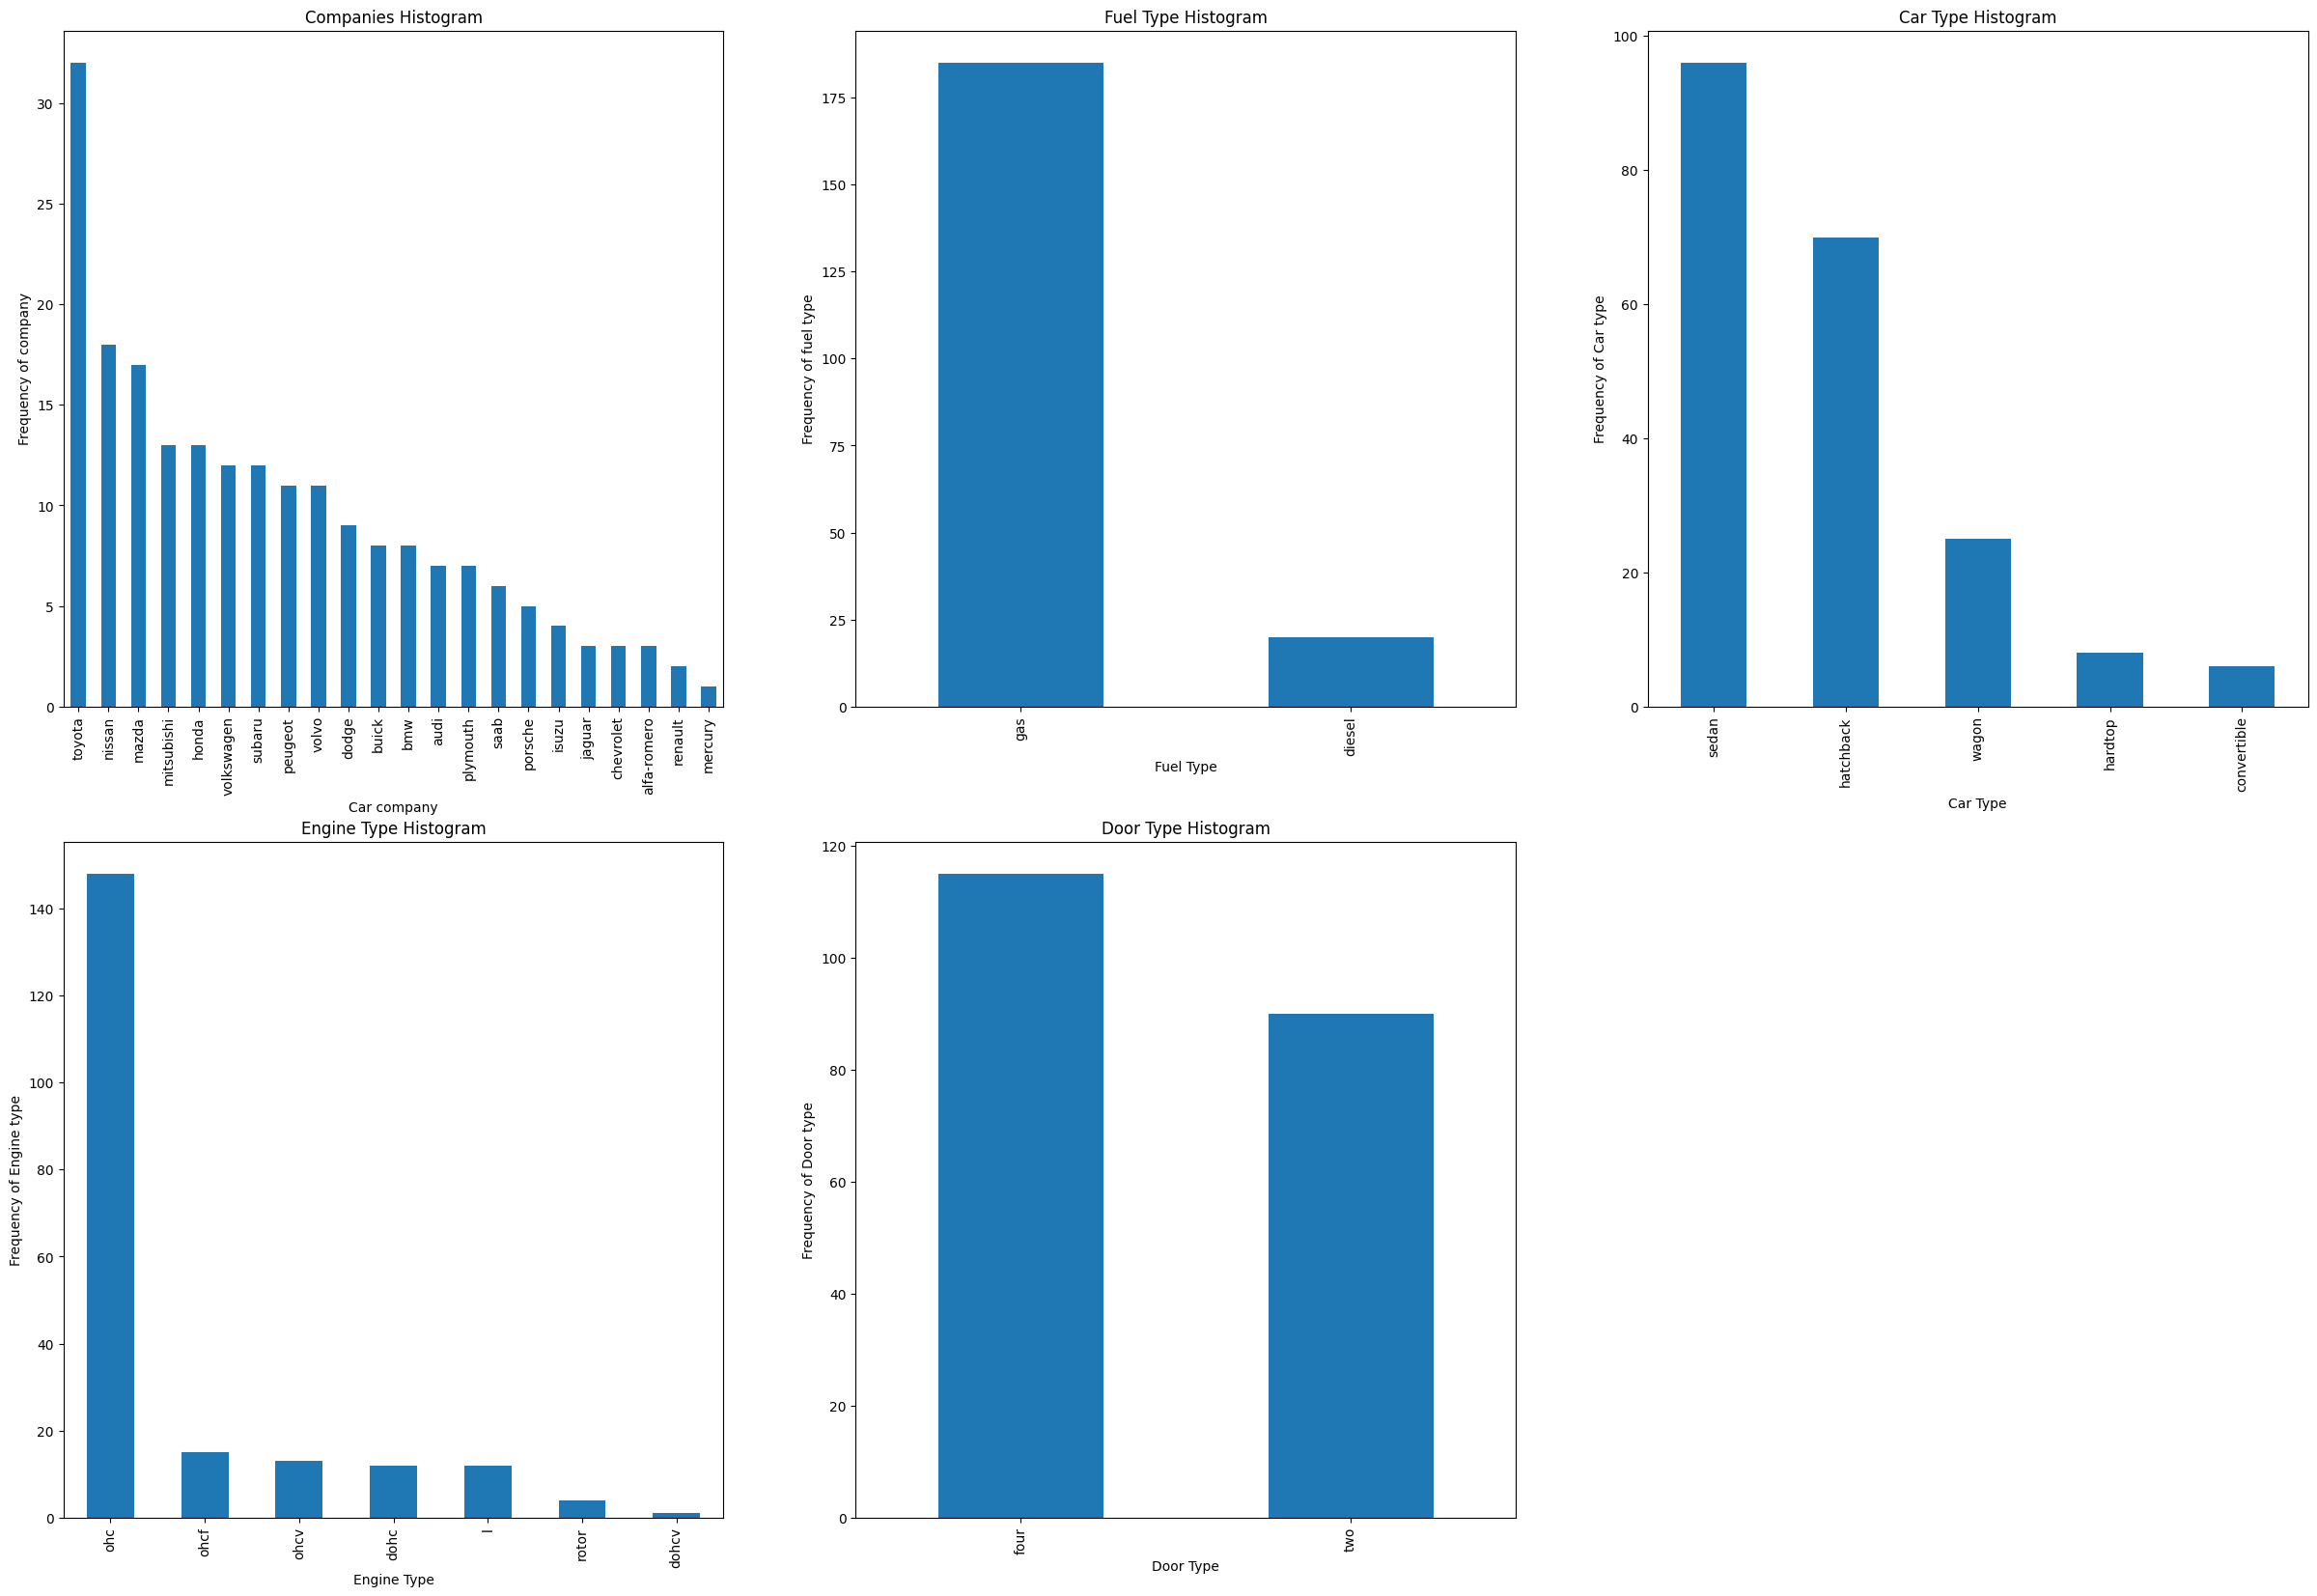

In [ ]:
plt.figure(figsize=(30, 20))

# Plot - shows how many cars each company has produced in the data
plt.subplot(2,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

# Plot - shows the type of fuels and the no.of cars that use them in the data
plt.subplot(2,3,2)
plt1 = cars.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

# Plot - shows the different types of cars and their count in the data
plt.subplot(2,3,3)
plt1 = cars.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

#Plot - shows the different types of engines and their count in the data
plt.subplot(2,3,4)
plt1 = cars.enginetype.value_counts().plot(kind='bar')
plt.title('Engine Type Histogram')
plt1.set(xlabel = 'Engine Type', ylabel='Frequency of Engine type')

#Plot - shows the different types of doorcount and their count in the data
plt.subplot(2,3,5)
plt1 = cars.doornumber.value_counts().plot(kind='bar')
plt.title('Door Type Histogram')
plt1.set(xlabel = 'Door Type', ylabel='Frequency of Door type')

plt.show()

Inference

- Toyota seemed to be favoured car company

- There are more Gas fuelled cars than Diesel fuelled cars

- Sedan is the top car type preferred

- ohc engine type is highly preferred

- 4-door cars are preferred than 2-door cars

### Feature vs avg-price

Now we'll figure out which features affect the car price the most

FEATURE: Symboling

Defines the risk scale of the car. Higher the symboling value higher the risk. [+3 very risky, -3 less risky]

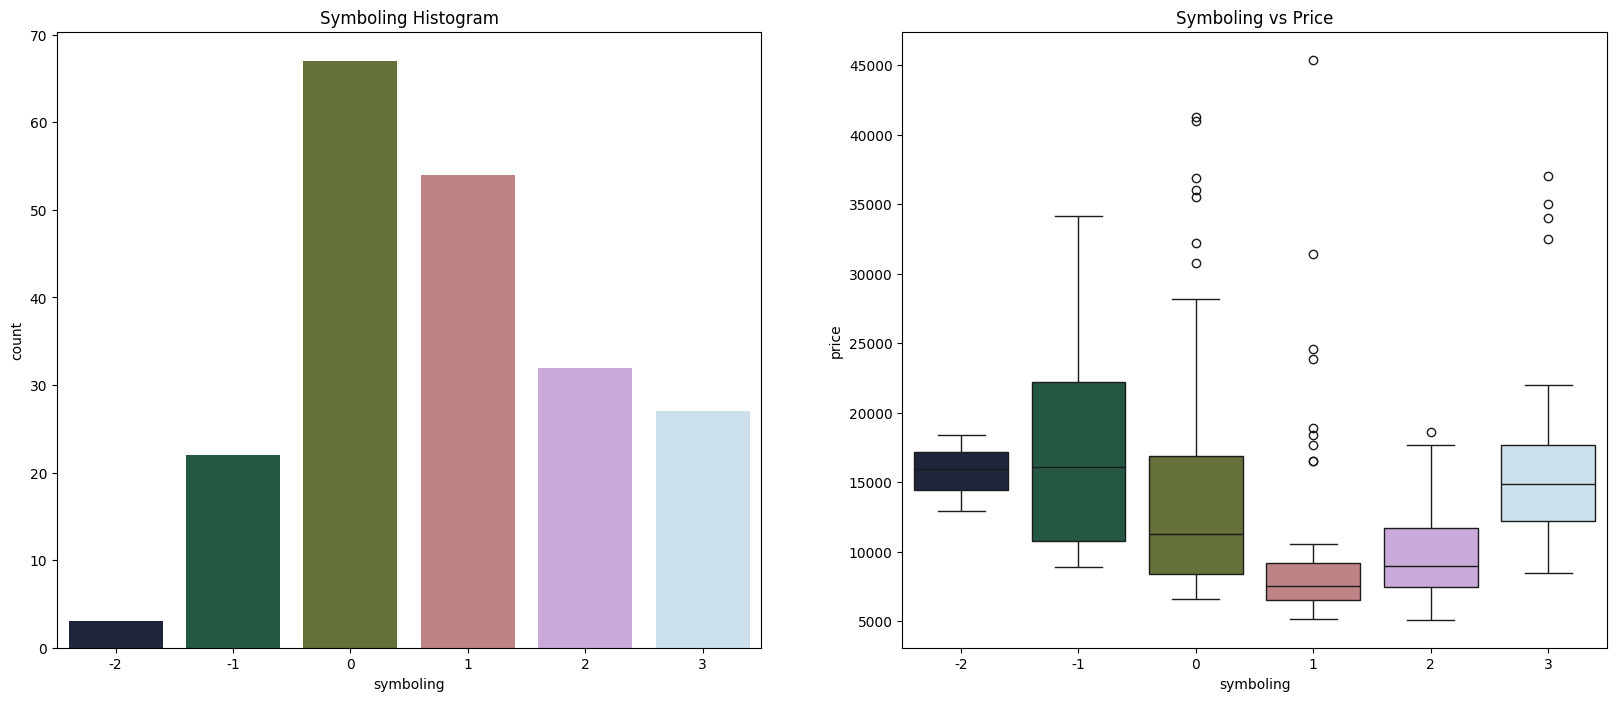

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(x=cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

Inference

- Symbol 0 & 1 cars are most sold, price (around $12,500 & $9,000 respectively)

- The cars with -1 symboling seems to be high priced (risk rating -1 is quite good). 

- But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

FEATURE: Engine type

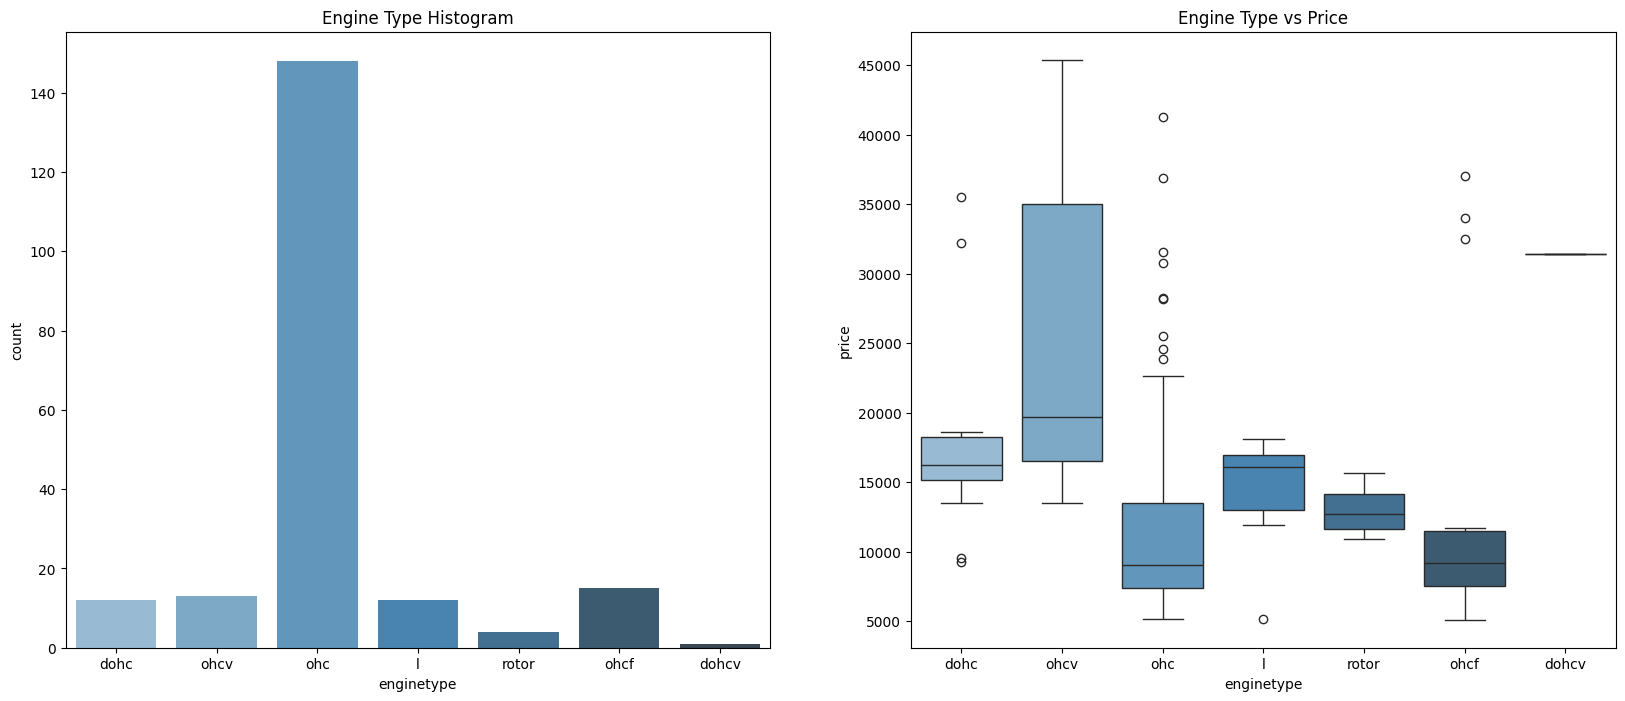

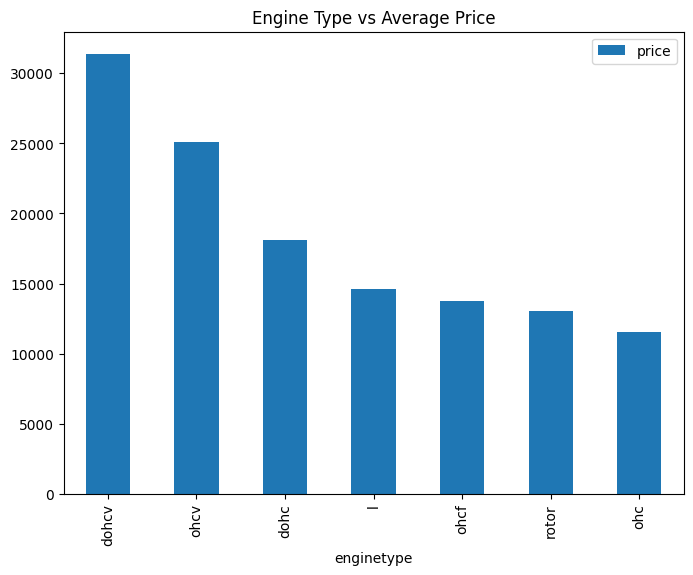

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(x=cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("Blues_d"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

Inference

- ohc Engine type seems to be most favoured type.

- ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

FEATURE: Company name, fuel type, car type

<Figure size 2000x600 with 0 Axes>

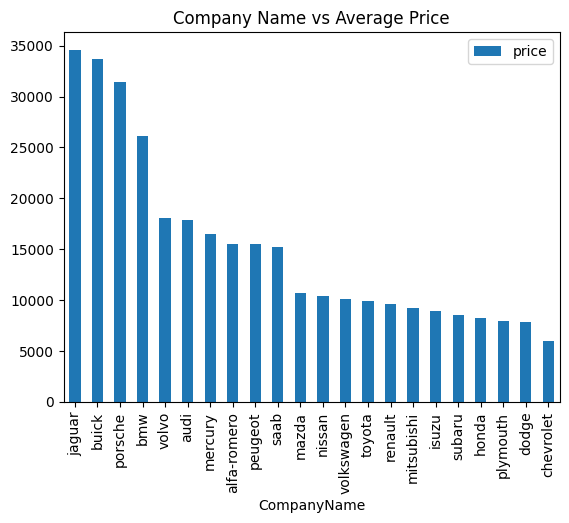

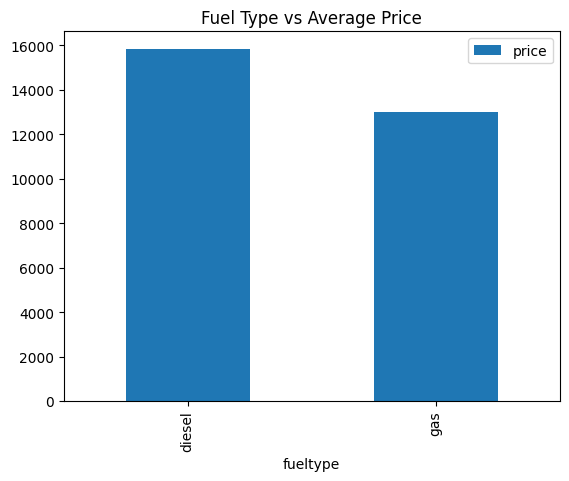

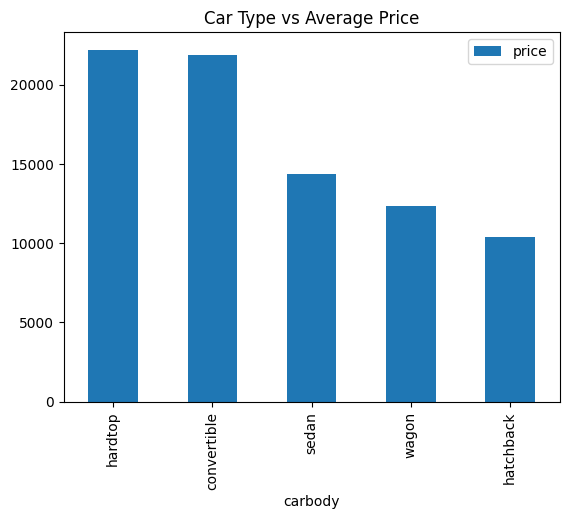

In [ ]:
plt.figure(figsize=(20, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

# feature 4
# Fuel Type

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

# feature 5
# Car type

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

Inference

- Jaguar and Buick seem to have highest average price.

- Diesel car has higher average price than gas car.

- Hardtop and convertible have higher average price.

Analyse the data, derive and select features, process data, split data and finally select algorithm required.

FEATURE: door number, aspiration, engine location, cylinder number, fuel system, drive-wheel

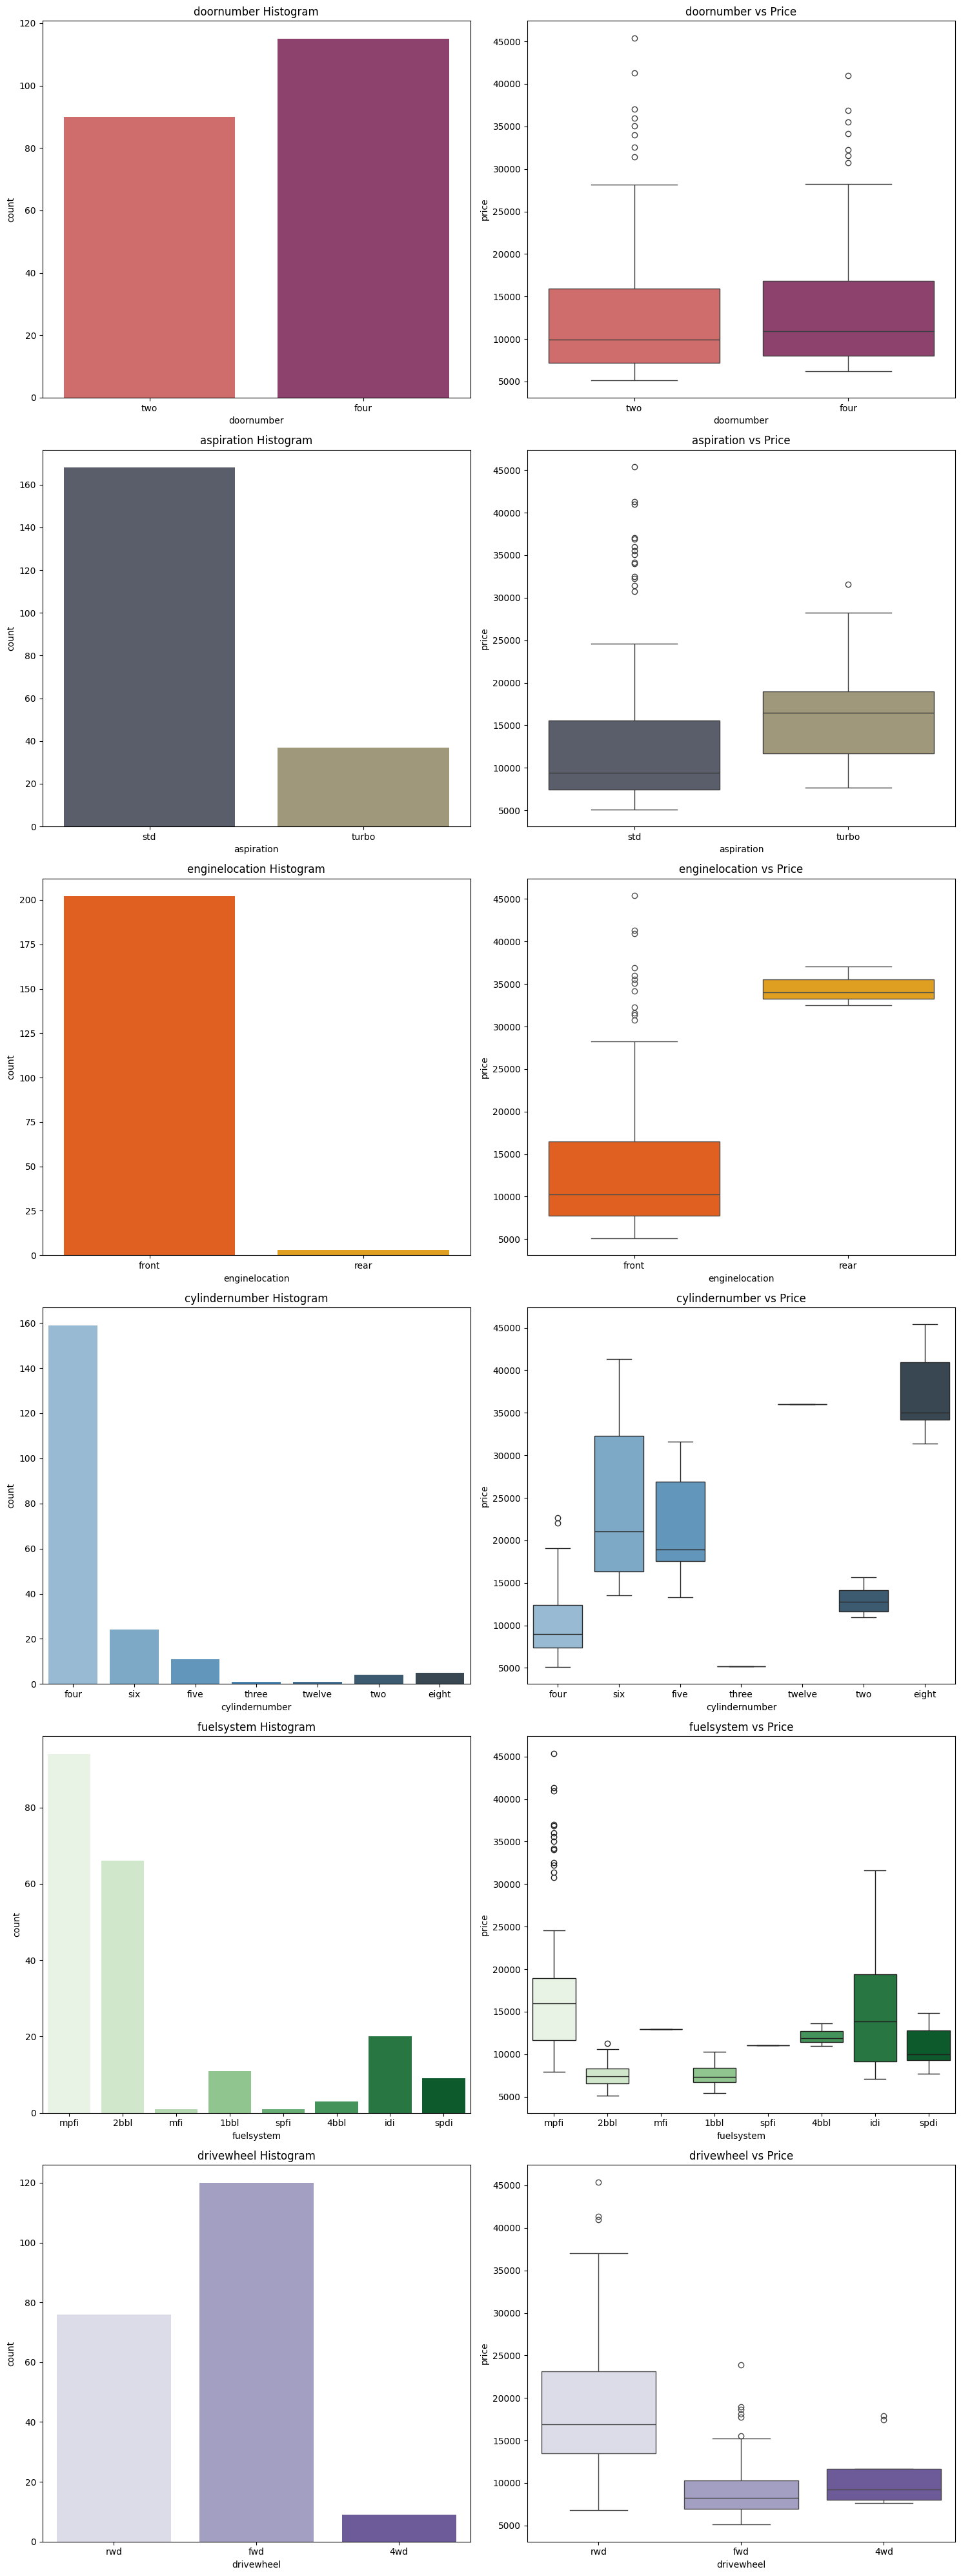

In [ ]:
# creating a helping function to generate count plots & box plots for the rest of the features
# DRY - Don't Repeat Yourself

def plot_count_and_box(x, ftNumber, plte):
    plt.subplot(6,2,ftNumber)
    plt.title(x+' Histogram')
    sns.countplot(x=cars[x],palette=(plte))
    plt.subplot(6,2,(ftNumber+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=(plte))

plt.figure(figsize=(15, 40))

plot_count_and_box('doornumber', 1, "flare")
plot_count_and_box('aspiration', 3, "cividis")
plot_count_and_box('enginelocation', 5, "autumn")
plot_count_and_box('cylindernumber', 7, "Blues_d")
plot_count_and_box('fuelsystem', 9, "Greens")
plot_count_and_box('drivewheel', 11, "Purples")

plt.tight_layout()

Inference

- Difference in door numbers doesn't make a big difference in car price

- Turbo has higher price range than std

- Engine location rear engines have an higher price range (NOTE : has very few data points, so inference is difficult)

- Most common cylinder types are 8, 6, and 5. The 8 cylinder type has the highest price range.

- mpfi and 2bbl are most common fuel systems. mfpi and idi has highest price range. But other are also pretty close(NOTE: due to few data points inference is difficult)

- A very significant difference in drive-wheel category. most high ranged cars seems to prefer rwd drive-wheel. fwd cars are the most preferred.

# Phase 3 - Model Selection

## Vedang Paithankar [21BCE0791]

### Visualising Numerical Data

This is to find correlation between data and price. How these data affect the price.

# using scatter plot

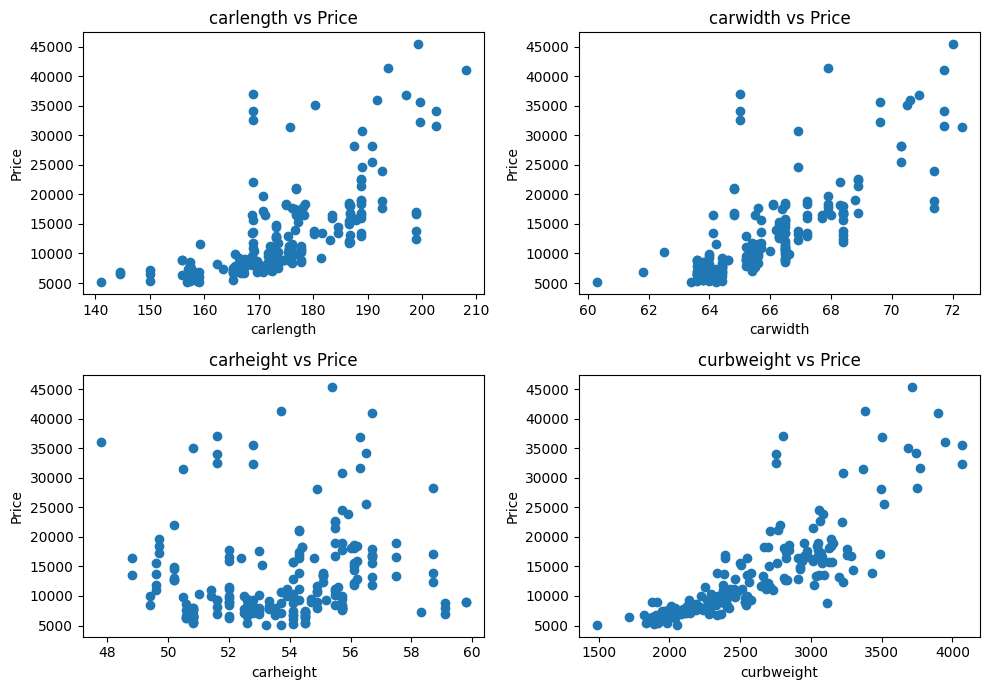

In [ ]:
def plot_scatter(x, ftNumber):
    plt.subplot(2,2,ftNumber)
    plt.scatter(cars[x], cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10, 7))

plot_scatter('carlength', 1)
plot_scatter('carwidth', 2)
plot_scatter('carheight', 3)
plot_scatter('curbweight', 4)

plt.tight_layout()

Inference

- Carwidth, carlength and curbweight seems to have a positive correlation with price.

- Carheight doesn't show any significant trend with price.

### Understanding correlation between remaining features and price

# using pair plot

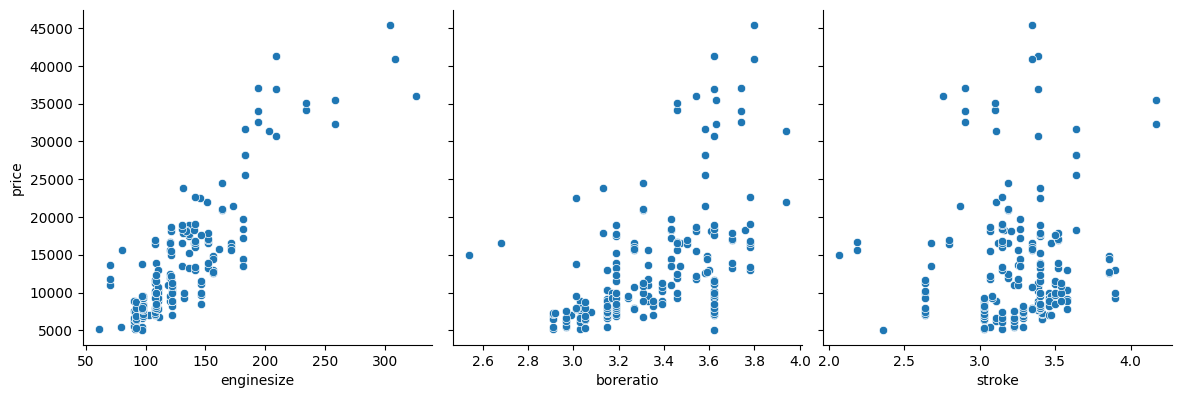

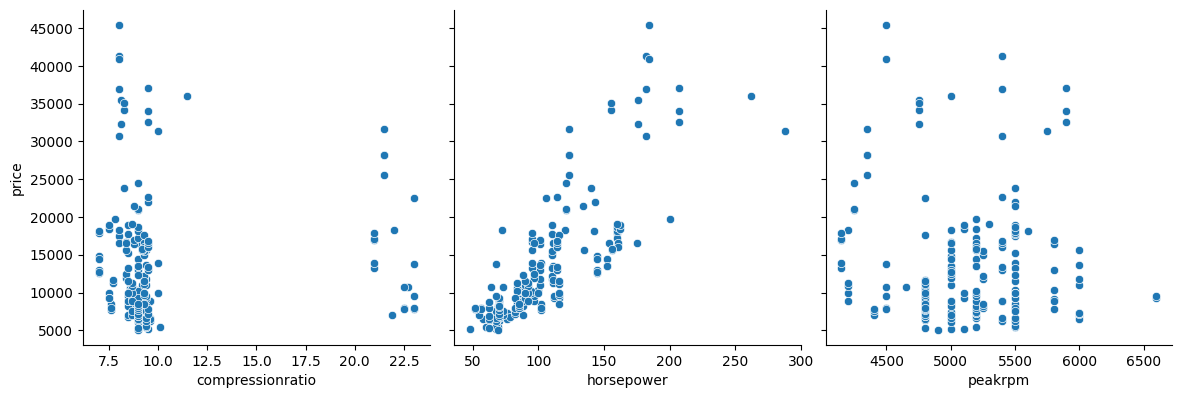

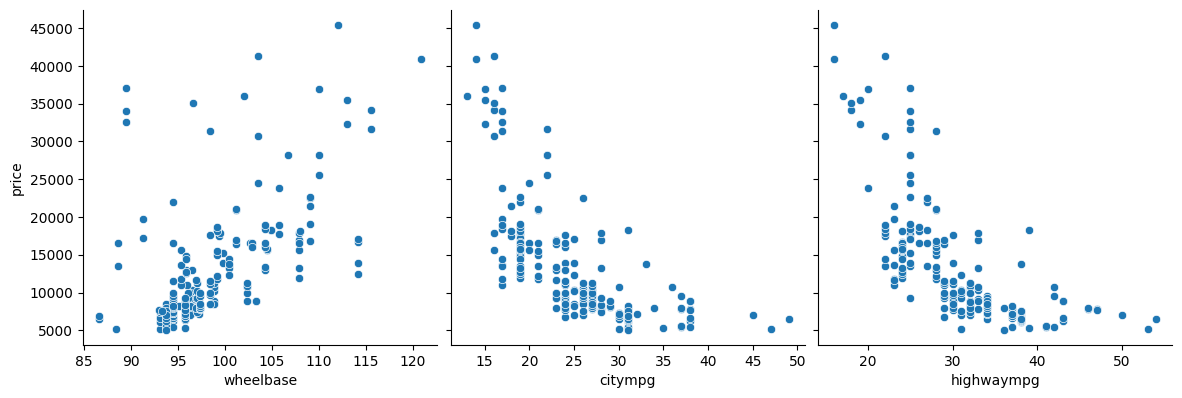

In [ ]:
def pair_plot(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pair_plot('enginesize', 'boreratio', 'stroke')
pair_plot('compressionratio', 'horsepower', 'peakrpm')
pair_plot('wheelbase', 'citympg', 'highwaympg')

Inference

-  Enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price. As these values increase the price of the car also increases.

- Citympg, highwaympg - seem to have a significant negative correlation with price. As these values increase the price of the car decreases.

In [ ]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.841118268481845

With the above inference, we'll derive new features.

## Deriving new feature

### New Feature - Fuel Economy

Fueleconomy: This feature combines the city and highway miles per gallon (MPG) of the cars into a single metric representing fuel economy. By computing a weighted average of both MPG values, it provides a more comprehensive measure of fuel efficiency for each car. This new feature could be valuable for understanding the relationship between fuel economy and car prices, as well as for exploring trends in consumer preferences towards more fuel-efficient vehicles.

In [ ]:
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

Here, 0.55 and 0.45 are weights assigned to the city and highway MPG respectively. These weights are chosen arbitrarily or based on some domain knowledge, indicating the relative importance of each MPG value in determining overall fuel economy.

In [ ]:
#Binning the Car Companies based on avg prices of each Company.
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


### Bivariate Analysis:

Visualizing the relationship between two variables.

Scatterplot: Shows the relationship between fuel economy and price, colored by drivewheel type.

Bar plot: Shows the average price based on combinations of fuelsystem, drivewheel, and car range.

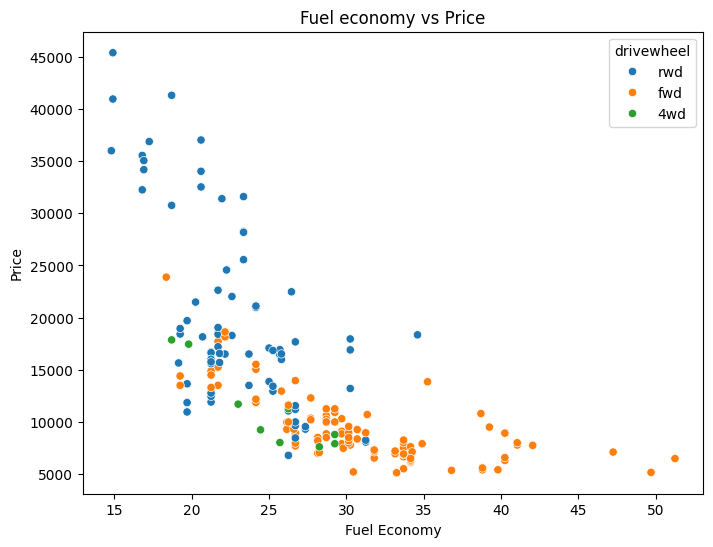

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

### Inference

fueleconomy has an obvios negative correlation with price and is significant.

<Figure size 2500x600 with 0 Axes>

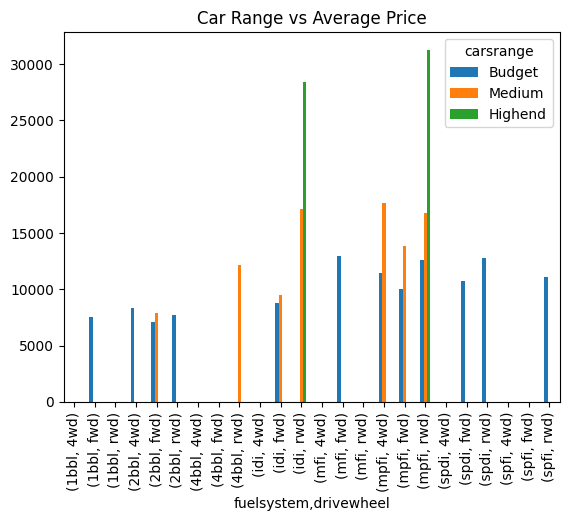

In [ ]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

### Inference

High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

### List of significant variables after Visual analysis :

- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [ ]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


### Pairplot

Visualization showing pairwise relationships in the dataset.
Useful for identifying patterns and correlations between variables.

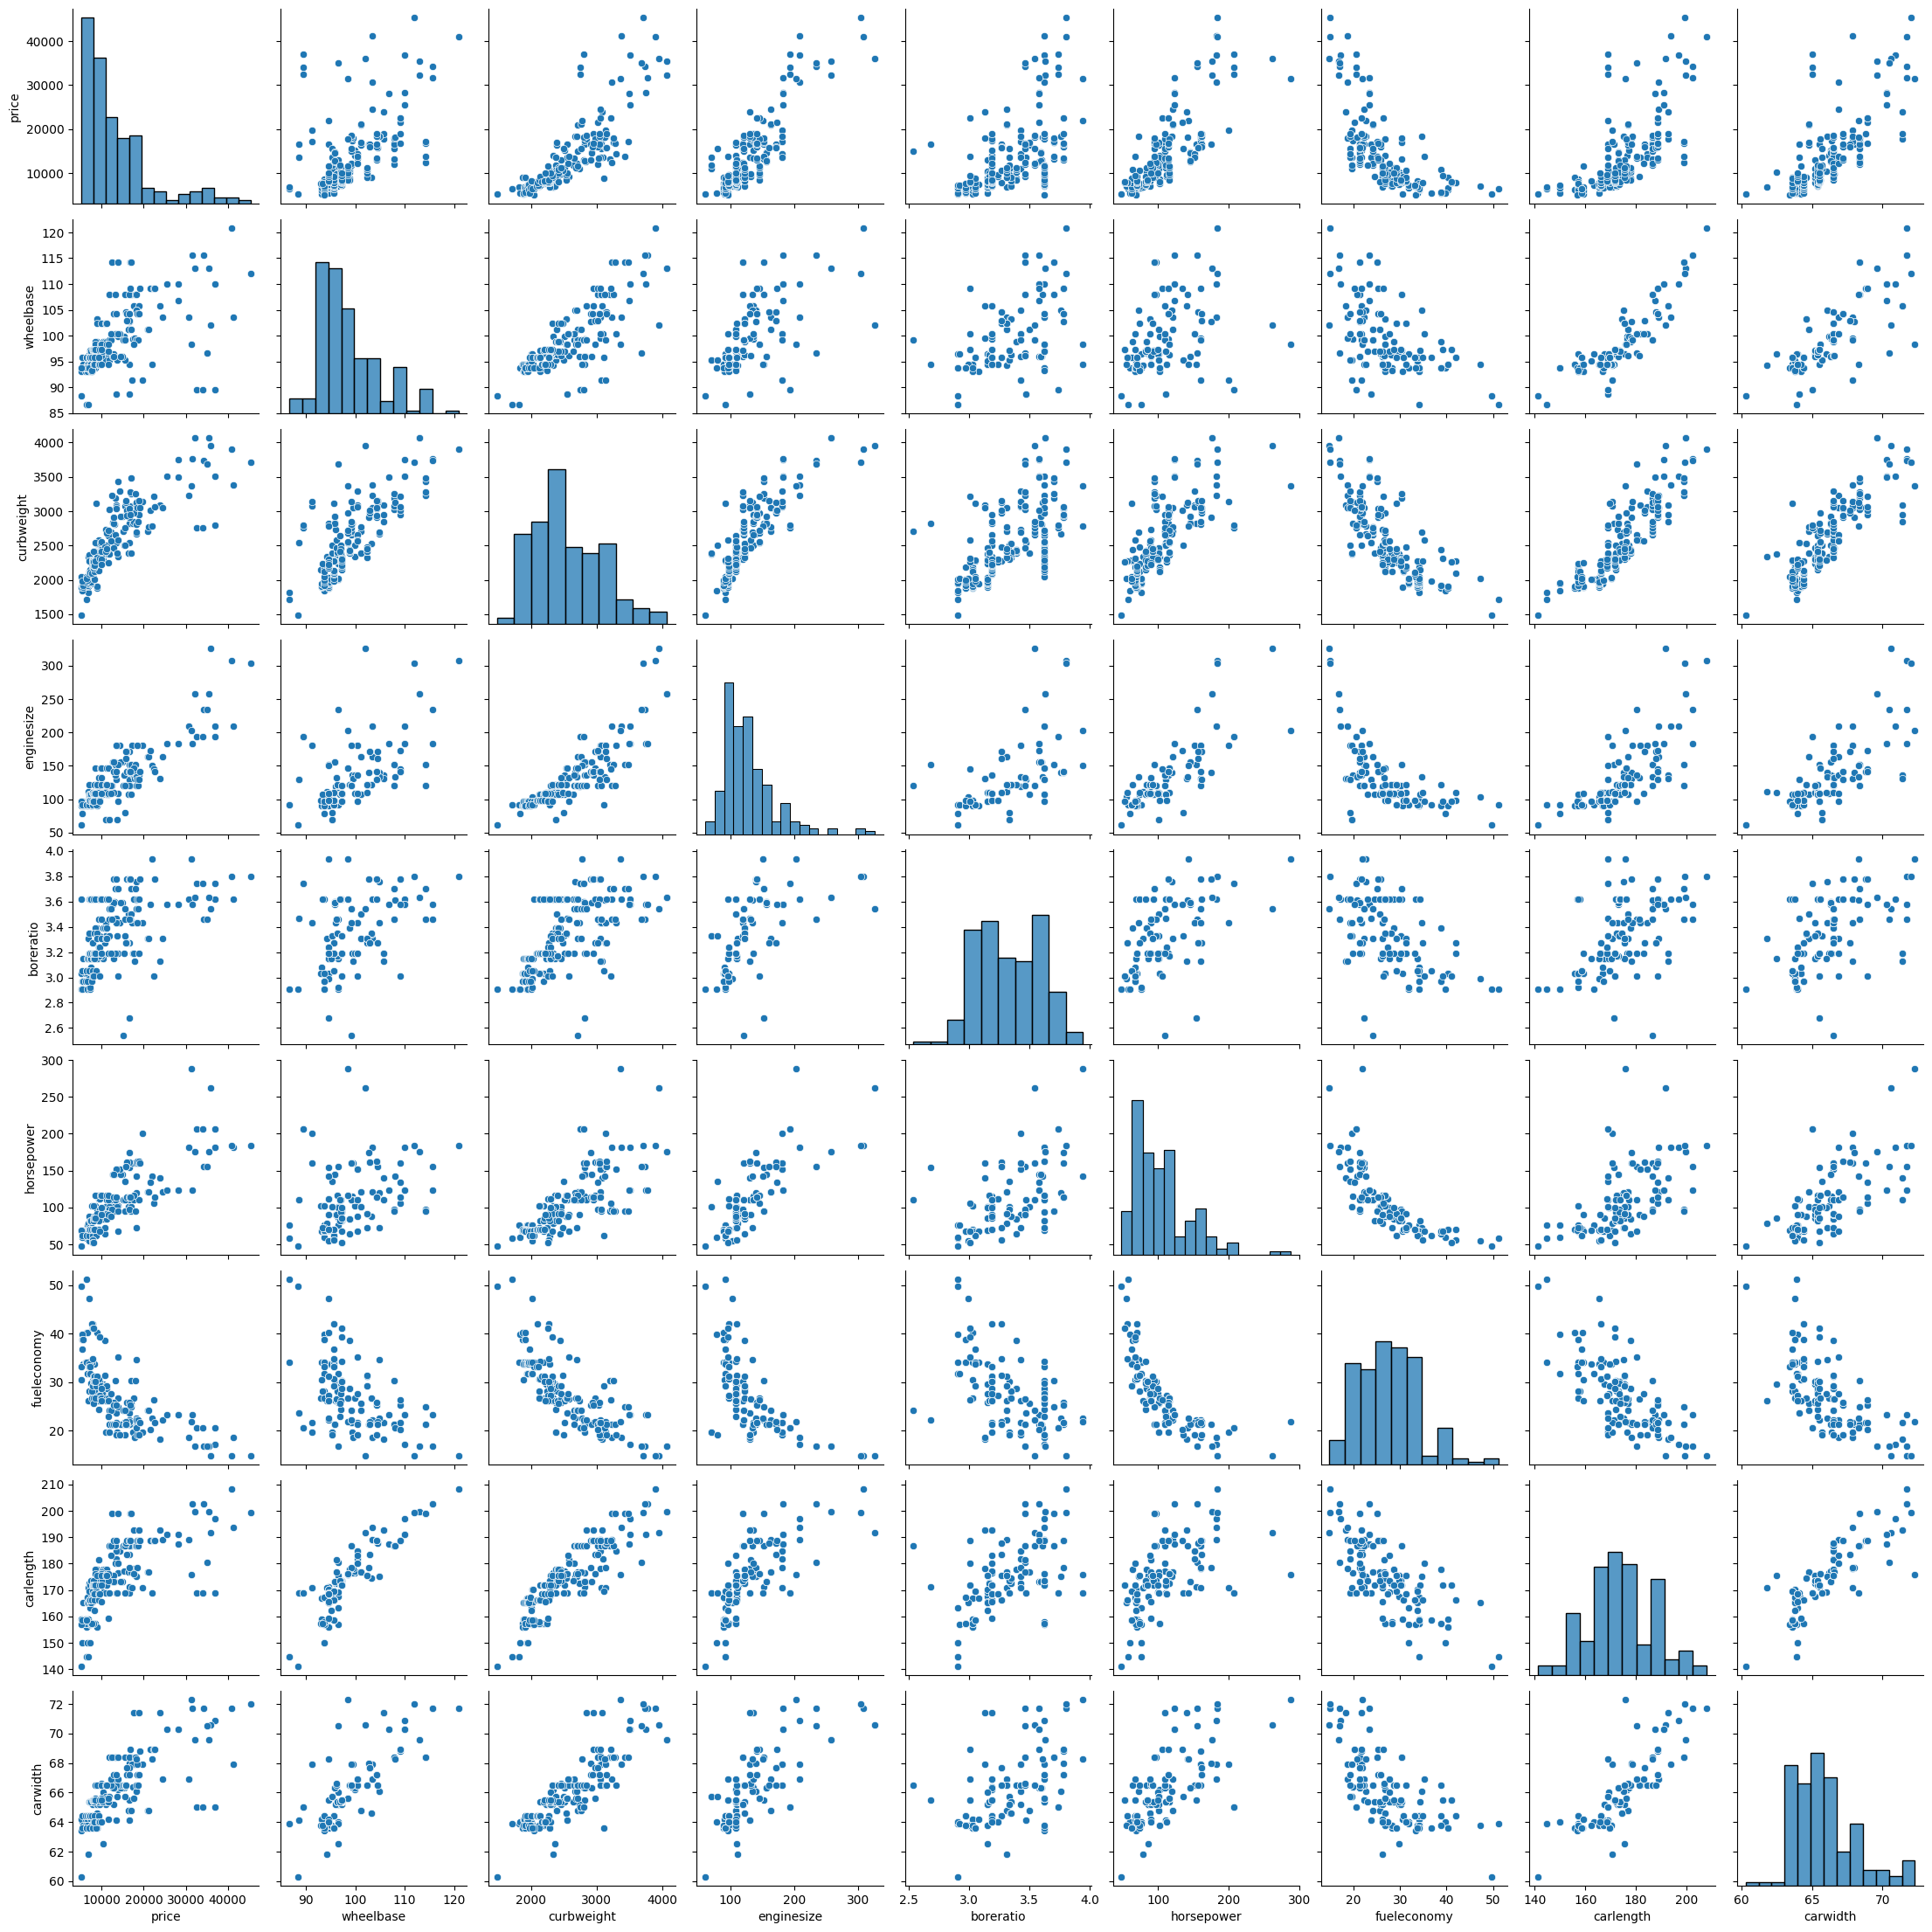

In [ ]:
sns.pairplot(cars_lr)
plt.show()

### Dummy Variables:

Purpose: Convert categorical variables into a numerical format for machine learning models.

Method: Create binary columns for each category, where 1 indicates the presence of the category and 0 indicates absence.

Example: For a variable like "fueltype" with categories "gas" and "diesel," create columns "gas" and "diesel" where 1 represents the presence of each fuel type.

Benefits: Allows models to use categorical data without assuming any numerical relationship between categories.

In [ ]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [ ]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,True,...,False,False,False,True,False,False,False,False,True,False
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,True,...,False,False,False,True,False,False,False,False,True,False
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,True,...,True,False,False,False,True,False,False,False,True,False
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,True,...,False,False,False,True,False,False,False,False,True,False
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,True,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
cars_lr.shape

(205, 31)

# Phase 4: Model Building

## Harshit Aggarwal - [21BCE2180]

### Train-Test Split and feature scaling

Split the dataset into training and testing sets.

Training set: Used to train the machine learning model.

Testing set: Used to evaluate the model's performance on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

From now on every changes will be done to the df_train dataset. The df_test will remain untouched and only be used to test the accuracy of the model.

### Feature Scaling

Standardized numerical features to a common scale (0 to 1).
Prevents features with larger scales from dominating the model training process.

Min-max scaling transforms the numerical features such that they are scaled to a fixed range, usually between 0 and 1. It does this by subtracting the minimum value of the feature and then dividing by the range (the maximum value minus the minimum value). This scaling method is useful when the features have different ranges and units, ensuring that all features contribute equally to the analysis and preventing any particular feature from dominating due to its larger scale.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,True,...,False,False,False,True,False,False,False,False,False,False
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,True,...,False,False,False,True,False,False,False,False,False,True
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,True,...,False,False,False,True,False,False,False,False,False,False
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,True,...,False,False,False,True,False,False,False,False,True,False
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,True,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


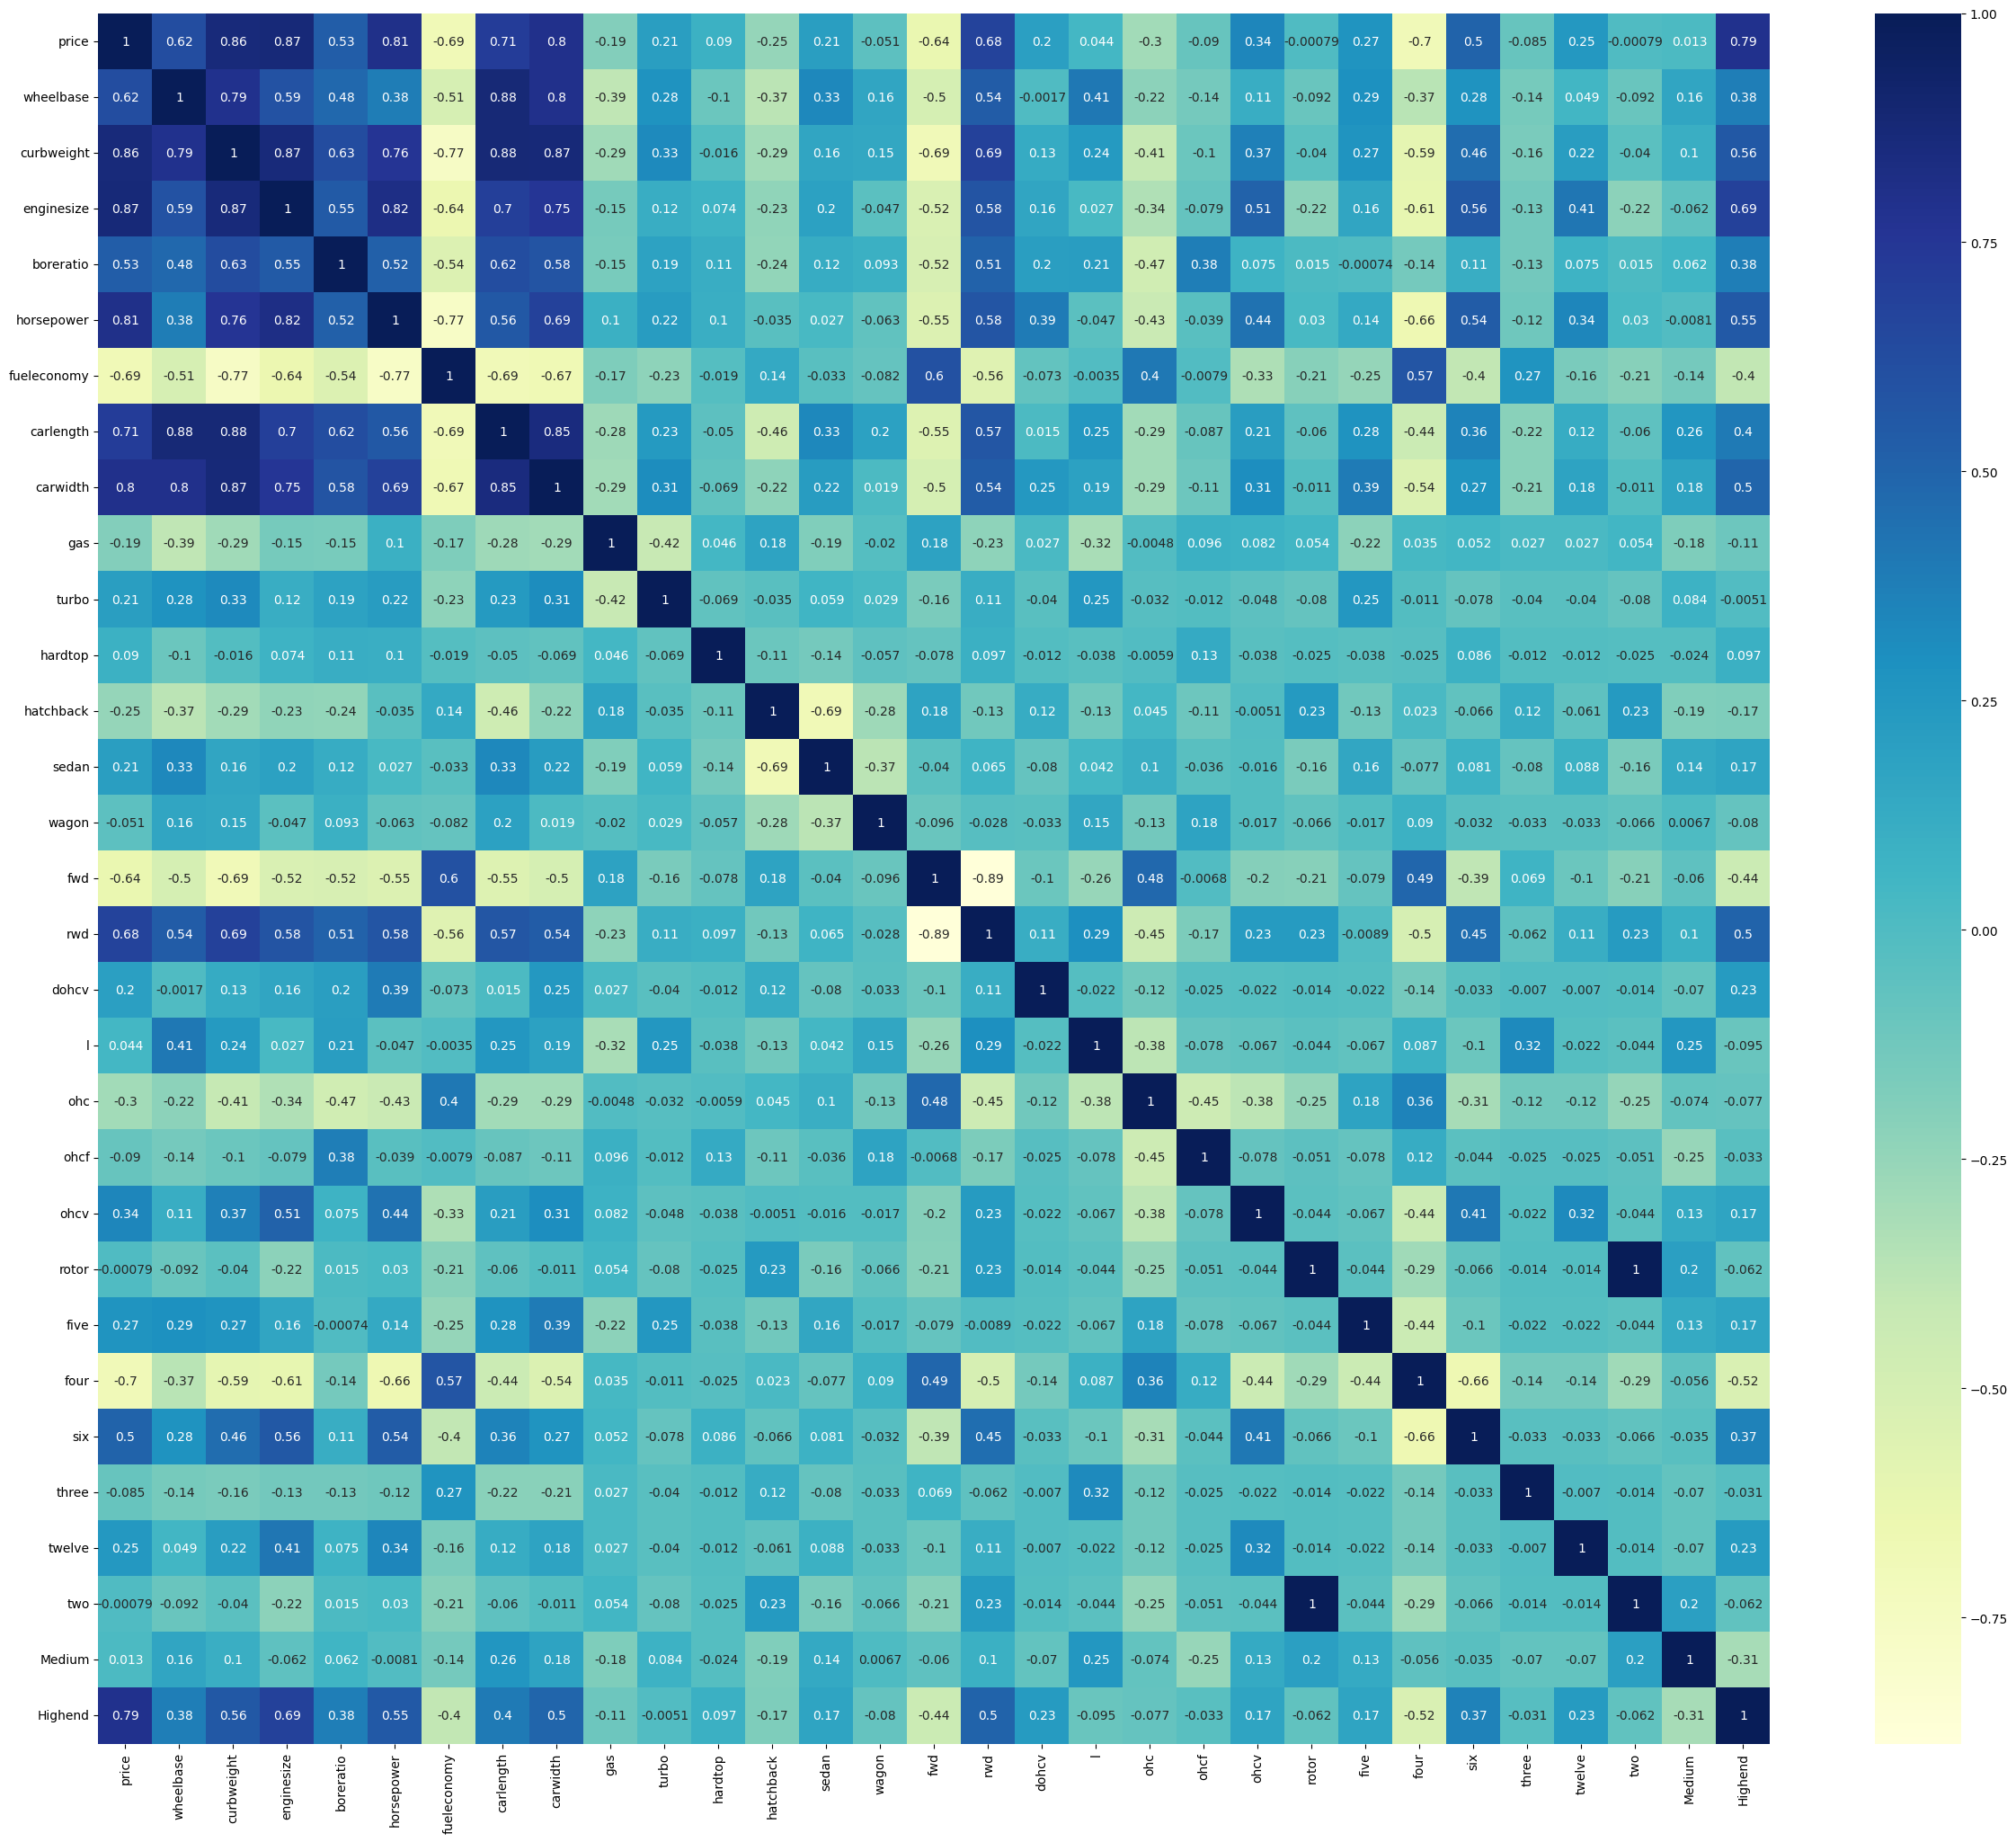

In [ ]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend.

In [ ]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

### Installing Libraries

In [ ]:
#Installing the required libraries
!pip install scikit-learn
!pip install statsmodels


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 33.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


### Importing libraries

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Linear Regression model and Recursive Feature Elimination

In [ ]:
lm = LinearRegression()
# fit basically is used to train a model using a dataset
# Specifically, the fit method takes in a dataset (typically represented as a 2D array or matrix) and a set of labels, and then fits the model to the data.
lm.fit(X_train,y_train)
# estimator is the type of algorithm used
rfe = RFE(estimator = lm, n_features_to_select = 10)
# fitting the model to the data
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 20),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 21),
 ('Medium', False, 12),
 ('Highend', True, 1)]

In [ ]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

In [ ]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.530864,0.291667,False,True,False,False,False,False
125,0.500388,0.395833,0.213992,0.666667,True,False,False,False,False,True
166,0.314973,0.266667,0.344307,0.308333,True,False,False,False,False,False
1,0.411171,0.262500,0.244170,0.316667,False,False,False,False,False,False
199,0.647401,0.475000,0.122085,0.575000,False,False,True,False,False,False


In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) 
    lm = sm.OLS(y,X).fit() 
    print(lm.summary())
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
X_train_rfe.hatchback = label_encoder.fit_transform(X_train_rfe.hatchback)
X_train_rfe.sedan = label_encoder.fit_transform(X_train_rfe.sedan)
X_train_rfe.wagon = label_encoder.fit_transform(X_train_rfe.wagon)
X_train_rfe.dohcv = label_encoder.fit_transform(X_train_rfe.dohcv)
X_train_rfe.twelve = label_encoder.fit_transform(X_train_rfe.twelve)
X_train_rfe.Highend = label_encoder.fit_transform(X_train_rfe.Highend)

### Model 1

In [ ]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.29e-70
Time:                        11:17:54   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

- As you can see fueleconomy and twelve has a p-value of > 0.05

- As twelve p-value(0.079) > fueleconomy p-value(0.075)

- Therefore we’ll drop twelve

### Model 2

In [ ]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           4.25e-71
Time:                        11:17:54   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      

- As you can see fueleconomy has a p-value(0.154) of > 0.05

- Therefore we’ll drop fueleconomy

### Model 3

In [ ]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           7.85e-72
Time:                        11:17:54   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [ ]:
checkVIF(X_train_new)

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Highend,1.63
7,dohcv,1.46


- All p-values are < 0.05

- Curbweight has the highest VIF (8.1) > 3

- Therefore we’ll drop curbweight


### Model 4

In [ ]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           4.70e-70
Time:                        11:17:54   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [ ]:
checkVIF(X_train_new)

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,Highend,1.56
6,dohcv,1.21


- All p-values are < 0.05

- Curbweight has the highest VIF (6.06) > 3

- Therefore we’ll drop sedan

### Model 5

In [ ]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.68e-69
Time:                        11:17:54   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [ ]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.82
1,horsepower,2.39
2,carwidth,2.09
6,Highend,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


- All p-value of wagon(0.315) is > 0.05

- horsepower has the highest VIF (2.39) < 3

- Therefore we’ll drop wagon

### Model 6

In [ ]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

In [ ]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.57e-70
Time:                        11:17:54   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [ ]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13


- All p-values are < 0.05

- horsepower has the highest VIF (2.39) < 3

- Both conditions satisfied.

- Therefore no insignificant variables

## SUCCESS!!

In [ ]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 122 to 8
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       143 non-null    float64
 1   horsepower  143 non-null    float64
 2   carwidth    143 non-null    float64
 3   hatchback   143 non-null    int64  
 4   dohcv       143 non-null    int64  
 5   Highend     143 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.8 KB


These are the features that are significant in predicting the car price.

### Model 7

Dropping dohcv just to see the changes in model statistics. How it changes.

In [ ]:
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.04e-67
Time:                        11:17:55   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
4,Highend,1.53
3,hatchback,1.10


In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

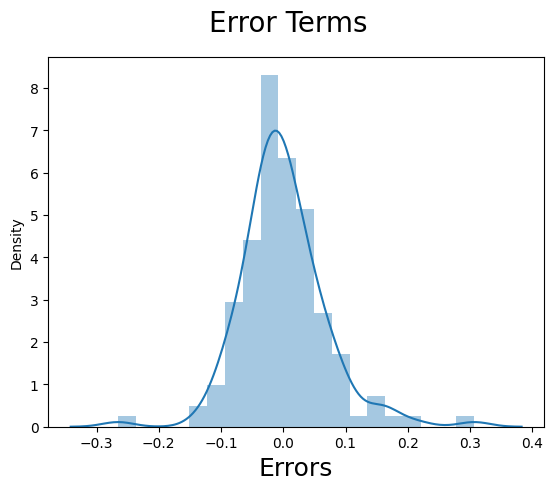

In [ ]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)  

In [ ]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,horsepower,carwidth,hatchback,Highend
160,1.0,0.116129,0.200000,False,False
186,1.0,0.212903,0.315789,False,False
59,1.0,0.206452,0.421053,True,False
165,1.0,0.387097,0.157895,False,False
140,1.0,0.135484,0.136842,True,False


In [ ]:
X_test_new.shape

(62, 5)

### Predicting price

In [ ]:
y_pred = lm.predict(X_test_new)
print(y_pred)

160    0.047811
186    0.136225
59     0.133637
165    0.150432
140   -0.010054
         ...   
28     0.107261
29     0.298549
182    0.042504
40     0.014119
128    0.741297
Length: 62, dtype: object


In [ ]:
import numpy as np

dummy_features = np.zeros((len(y_pred), len(num_vars) - 1))
y_pred_full = np.concatenate((dummy_features, y_pred.to_numpy().reshape(-1, 1)), axis=1)
y_pred_price_actual = scaler.inverse_transform(y_pred_full)[:, -1]
print(y_pred_price_actual)

[ 7311.49287063 10848.13593289 10744.63043851 11416.44936135
  4996.81840024 10744.63043851 22427.79771859 23581.54507584
 14536.44735877 21710.89169278 19807.00604477 19378.5061419
 16815.54227932 12165.99707195 43600.88150611  5504.22825119
  7311.49287063 15354.21630399 15823.85670908 17341.25379092
 16974.82359013 16974.82359013 35051.63409205  4428.80026186
 14536.44735877 20125.56866639 17341.25379092 34338.67466698
 22676.45162253  9260.46562161  5428.39406938 35376.92379061
 16815.54227932 24866.17394995 17042.74953467 11150.88207997
 13698.32475809 12880.55581287  6198.29543544 13309.35100582
 44100.67840986 13945.59037882  5655.60132473  9366.4563021
  3853.16917629 10055.69101535  6084.69180776 14203.24942293
  7099.21621958  8916.87426239  5095.19613354 14536.44735877
  4989.20545305 12552.19034803 23517.56573205  5721.04208316
  9689.55610464  9689.55610464 17341.25379092  7099.21621958
  5963.77052298 35051.63409205]


Text(0, 0.5, 'Predicted Price')

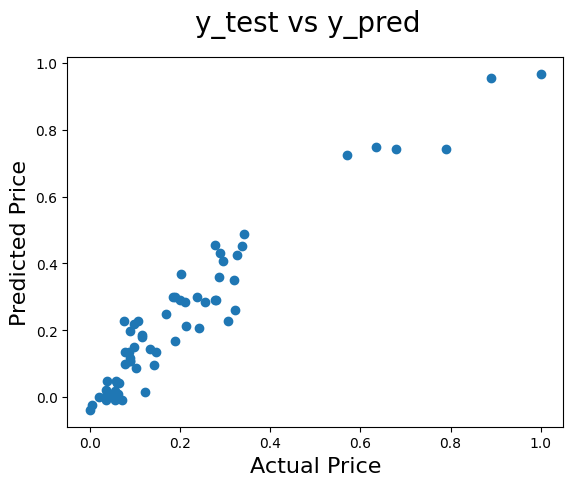

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('Actual Price', fontsize=16)                          
plt.ylabel('Predicted Price', fontsize=16)  

### Calculating R2 score

- This tells us how good our model is.

- R2 score ranges from 0 to 1.

- The greater the value of r2 the better the model is.

- We got a score of 0.86 which is pretty good.

- Meaning we're able to predict 86% of the relationship between price and the features of the car.

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8614595209022037

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.04e-67
Time:                        11:46:36   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ecf1be0-ef5a-478d-abc5-fceb5ee117df' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>